# AV8

## Sumário
1. [Questão 1: Azepina](#questao1)
2. [Questão 2: Trifenileno e derivados](#questao2)
3. [Análises e Conclusões](#conclusoes)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh
import networkx as nx
import pandas as pd
from huckel_method import Huckel
import math

plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12
plt.style.use('default')

## Questão 1: Azepina <a id="questao1"></a>

### Contexto da Azepina

A azepina é um composto heterocíclico de sete membros contendo um átomo de nitrogênio. É um sistema aromático não-benzênico que segue a regra de Hückel (4n+2 elétrons π). A azepina possui 8 elétrons π (6 do anel + 2 do par isolado do nitrogênio), mas devido à geometria do anel de sete membros, não é planar e portanto não é aromática no sentido clássico.

### Numeração dos Átomos

In [ ]:
# Definição da estrutura da azepina
# Azepina: anel de 7 membros com 1 nitrogênio
n_atoms_azepina = 7
azepina = Huckel(n_atoms_azepina)

# Tipos de átomos (N na posição 0, C nas demais)
atom_types_azepina = ['N'] + ['C'] * 6
azepina.set_atom_types(atom_types_azepina)

# Conectividade (anel de 7 membros)
bonds_azepina = [(i, (i+1) % 7) for i in range(7)]
azepina.set_connectivity(bonds_azepina)

print("Estrutura da Azepina:")
print(f"Número de átomos: {n_atoms_azepina}")
print(f"Tipos de átomos: {atom_types_azepina}")
print(f"Ligações: {bonds_azepina}")
print(f"Número de elétrons π: {n_atoms_azepina} (1 por átomo)")

Estrutura da Azepina:
Número de átomos: 7
Tipos de átomos: ['N', 'C', 'C', 'C', 'C', 'C', 'C']
Ligações: [(0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 0)]
Número de elétrons π: 7 (1 por átomo)


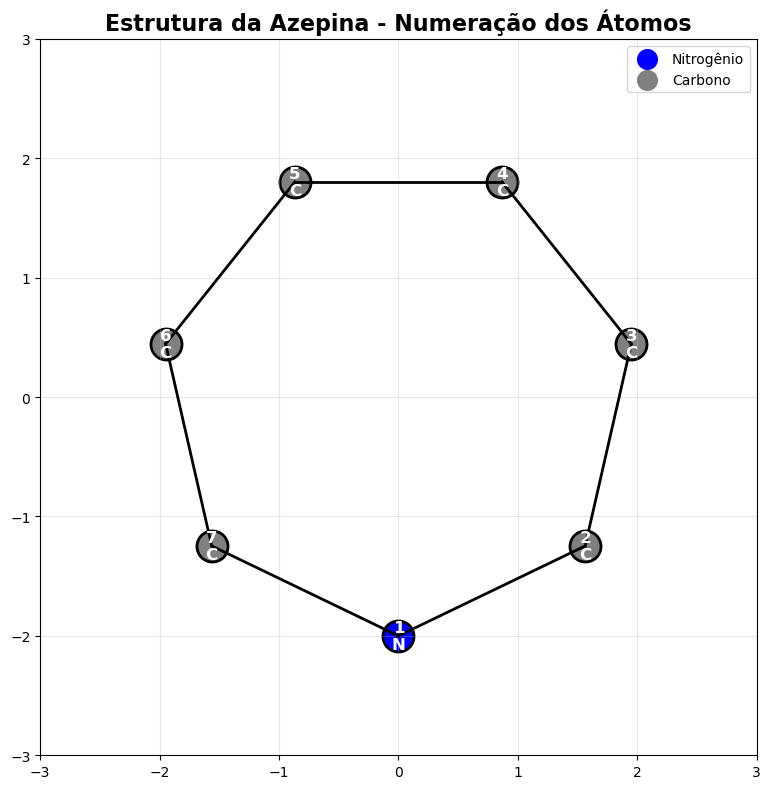

In [5]:
def get_pos_anel(n, radius=2):
    """Gera posições para um anel de n"""
    positions = []
    for i in range(n):
        angle = 2 * math.pi * i / n - math.pi/2  # Começar do topo
        x = radius * math.cos(angle)
        y = radius * math.sin(angle)
        positions.append((x, y))
    return positions

positions_azepina = get_pos_anel(7)

fig, ax = plt.subplots(figsize=(8, 8))

for i, (x, y) in enumerate(positions_azepina):
    color = 'blue' if atom_types_azepina[i] == 'N' else 'gray'
    ax.scatter(x, y, s=500, c=color, edgecolors='black', linewidth=2)
    ax.text(x, y, f'{i+1}\n{atom_types_azepina[i]}', ha='center', va='center', 
            fontsize=12, fontweight='bold', color='white')

for i, j in bonds_azepina:
    x1, y1 = positions_azepina[i]
    x2, y2 = positions_azepina[j]
    ax.plot([x1, x2], [y1, y2], 'k-', linewidth=2)

ax.set_title('Estrutura da Azepina - Numeração dos Átomos', fontsize=16, fontweight='bold')
ax.set_aspect('equal')
ax.grid(True, alpha=0.3)
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)

ax.scatter([], [], c='blue', s=200, label='Nitrogênio')
ax.scatter([], [], c='gray', s=200, label='Carbono')
ax.legend(loc='upper right')

plt.tight_layout()
plt.savefig('azepina_estrutura.png', dpi=300, bbox_inches='tight')
plt.show()

### Aplicação do Método de Hückel

In [6]:
# Hamiltoniana 
azepina.build_hamiltonian()
azepina.solve()

print("Matriz Hamiltoniana da Azepina:")
print(azepina.hamiltonian)
print("\nAutovalores (níveis de energia):")
for i, energy in enumerate(azepina.eigenvalues):
    print(f"E{i+1} = {energy:.4f}β")

Matriz Hamiltoniana da Azepina:
[[ 0.5 -1.   0.   0.   0.   0.  -1. ]
 [-1.   0.  -1.   0.   0.   0.   0. ]
 [ 0.  -1.   0.  -1.   0.   0.   0. ]
 [ 0.   0.  -1.   0.  -1.   0.   0. ]
 [ 0.   0.   0.  -1.   0.  -1.   0. ]
 [ 0.   0.   0.   0.  -1.   0.  -1. ]
 [-1.   0.   0.   0.   0.  -1.   0. ]]

Autovalores (níveis de energia):
E1 = -1.9452β
E2 = -1.2470β
E3 = -1.1122β
E4 = 0.4450β
E5 = 0.5862β
E6 = 1.8019β
E7 = 1.9712β


In [8]:
# HOMO/LUMO
n_electrons_azepina = 7  
occupations = azepina.get_electron_configuration(n_electrons_azepina)
homo_idx, lumo_idx, homo_energy, lumo_energy = azepina.get_homo_lumo(n_electrons_azepina)

print("Configuração Eletrônica:")
for i, occ in enumerate(occupations):
    print(f"Orbital {i+1}: {occ} elétrons (E = {azepina.eigenvalues[i]:.4f}β)")

print(f"\nHOMO: Orbital {homo_idx+1} (E = {homo_energy:.4f}β)")
if lumo_idx is not None:
    print(f"LUMO: Orbital {lumo_idx+1} (E = {lumo_energy:.4f}β)")
    print(f"Gap HOMO-LUMO: {lumo_energy - homo_energy:.4f}β")
else:
    print("LUMO: Sem orbitais vazios")

Configuração Eletrônica:
Orbital 1: 2.0 elétrons (E = -1.9452β)
Orbital 2: 2.0 elétrons (E = -1.2470β)
Orbital 3: 2.0 elétrons (E = -1.1122β)
Orbital 4: 1.0 elétrons (E = 0.4450β)
Orbital 5: 0.0 elétrons (E = 0.5862β)
Orbital 6: 0.0 elétrons (E = 1.8019β)
Orbital 7: 0.0 elétrons (E = 1.9712β)

HOMO: Orbital 4 (E = 0.4450β)
LUMO: Orbital 5 (E = 0.5862β)
Gap HOMO-LUMO: 0.1412β


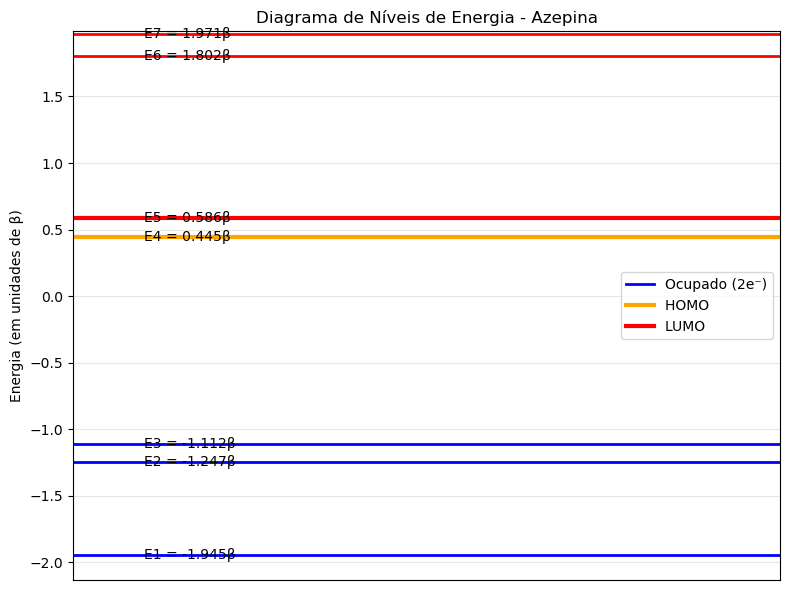

In [9]:
# Diagrama de níveis de energia
fig = azepina.plot_energy_levels(n_electrons_azepina, "Diagrama de Níveis de Energia - Azepina")
plt.savefig('azepina_niveis_energia.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
# ordens de ligação e populacoes eletronicas
bond_orders = azepina.calculate_bond_orders(n_electrons_azepina)
populations = azepina.calculate_electron_populations(n_electrons_azepina)

print("Ordens de Ligação:")
for bond, order in bond_orders.items():
    i, j = bond
    atom_i = atom_types_azepina[i]
    atom_j = atom_types_azepina[j]
    print(f"Ligação {i+1}-{j+1} ({atom_i}-{atom_j}): {order:.4f}")

print("\nPopulações Eletrônicas:")
for i, pop in enumerate(populations):
    print(f"Átomo {i+1} ({atom_types_azepina[i]}): {pop:.4f} elétrons")

print(f"\nTotal de elétrons: {sum(populations):.4f} (esperado: {n_electrons_azepina})")

Ordens de Ligação:
Ligação 1-2 (N-C): 0.6043
Ligação 2-3 (C-C): 0.5531
Ligação 3-4 (C-C): 0.7198
Ligação 4-5 (C-C): 0.4933
Ligação 5-6 (C-C): 0.7198
Ligação 6-7 (C-C): 0.5531
Ligação 7-1 (C-N): 0.6043

Populações Eletrônicas:
Átomo 1 (N): 0.6639 elétrons
Átomo 2 (C): 1.1926 elétrons
Átomo 3 (C): 0.9177 elétrons
Átomo 4 (C): 1.0577 elétrons
Átomo 5 (C): 1.0577 elétrons
Átomo 6 (C): 0.9177 elétrons
Átomo 7 (C): 1.1926 elétrons

Total de elétrons: 7.0000 (esperado: 7)


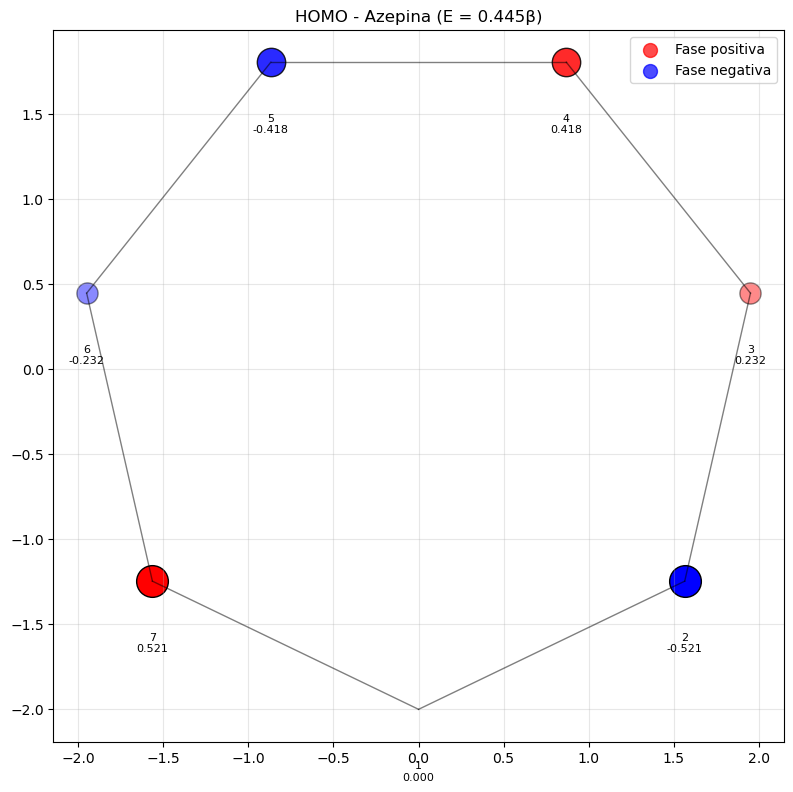

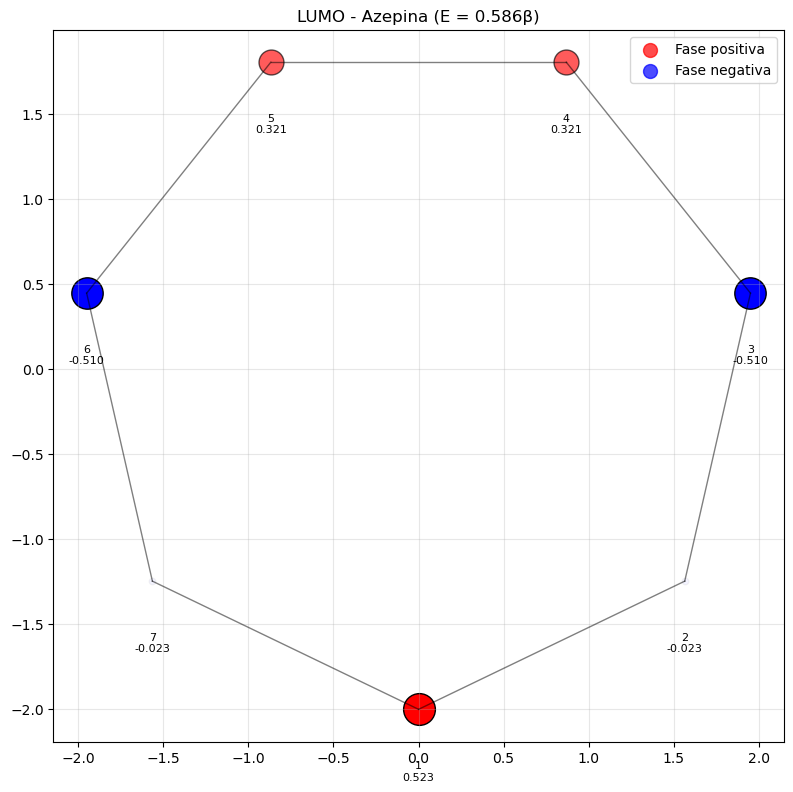

In [11]:
# Visualizacao dos orbitais HOMO e LUMO
if homo_idx >= 0:
    fig_homo = azepina.plot_molecular_orbital(homo_idx, positions_azepina, "HOMO - Azepina")
    plt.savefig('azepina_homo.png', dpi=300, bbox_inches='tight')
    plt.show()

if lumo_idx is not None:
    fig_lumo = azepina.plot_molecular_orbital(lumo_idx, positions_azepina, "LUMO - Azepina")
    plt.savefig('azepina_lumo.png', dpi=300, bbox_inches='tight')
    plt.show()

## Questão 2: Trifenileno e Derivados Aza <a id="questao2"></a>

### Estruturas Moleculares

Vamos trabalhar com três sistemas:
1. **Trifenileno** - 18 átomos de carbono sp²
2. **Triazatrifenileno (3N)** - 3 nitrogênios piridínicos
3. **Hexaazatrifenileno (6N)** - 6 nitrogênios piridínicos

In [12]:
# Definicao das estruturas do trifenileno e derivados
n_atoms_trifenileno = 18

# Conectividade do trifenileno
def create_conectividade_trifenileno():
    bonds = [
        # Anel central 
        (0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 0),
        # Anéis externos
        (0, 6), (6, 7), (7, 8), (8, 1),
        (2, 9), (9, 10), (10, 11), (11, 3),
        (4, 12), (12, 13), (13, 14), (14, 5),
        # Conexões adicionais para completar a estrutura
        (6, 17), (17, 16), (16, 15), (15, 14),
        (8, 9), (11, 12), (15, 16), (16, 17), (17, 0)
    ]
    return bonds

# Estrutura aproximada do trifenileno
bonds_trifenileno = [
    (0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 0),  # Hexágono central
    (0, 6), (1, 7), (2, 8), (3, 9), (4, 10), (5, 11),  # Conexões para anéis externos
    (6, 7), (7, 8), (8, 9), (9, 10), (10, 11), (11, 6)  # Anel externo
]

# Adicionar mais átomos para chegar a 18
for i in range(12, 18):
    bonds_trifenileno.append((i-6, i))
    if i < 17:
        bonds_trifenileno.append((i, i+1))
    else:
        bonds_trifenileno.append((i, 12))

print(f"Número de ligações no trifenileno: {len(bonds_trifenileno)}")
print("Primeiras 10 ligações:", bonds_trifenileno[:10])

Número de ligações no trifenileno: 30
Primeiras 10 ligações: [(0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 0), (0, 6), (1, 7), (2, 8), (3, 9)]


In [ ]:
# Criar os três sistemas
systems = {
    'Trifenileno': {
        'n_atoms': 18,
        'atom_types': ['C'] * 18,
        'n_electrons': 18
    },
    'Triazatrifenileno (3N)': {
        'n_atoms': 18,
        'atom_types': ['C'] * 18,
        'n_electrons': 18
    },
    'Hexaazatrifenileno (6N)': {
        'n_atoms': 18,
        'atom_types': ['C'] * 18,
        'n_electrons': 18
    }
}

# Substituir carbonos por nitrogênios nos derivados
# 3N: posições 1, 7, 13
systems['Triazatrifenileno (3N)']['atom_types'][1] = 'N'
systems['Triazatrifenileno (3N)']['atom_types'][7] = 'N'
systems['Triazatrifenileno (3N)']['atom_types'][13] = 'N'

# 6N: posições 1, 4, 7, 10, 13, 16
for pos in [1, 4, 7, 10, 13, 16]:
    systems['Hexaazatrifenileno (6N)']['atom_types'][pos] = 'N'

# Criar objetos HuckelMethod para cada sistema
huckel_systems = {}
for name, data in systems.items():
    system = Huckel(data['n_atoms'])
    system.set_atom_types(data['atom_types'])
    system.set_connectivity(bonds_trifenileno)
    system.build_hamiltonian()
    system.solve()
    huckel_systems[name] = system
    
print("Sistemas criados e resolvidos:")
for name in huckel_systems.keys():
    print(f"- {name}")

Sistemas criados e resolvidos:
- Trifenileno
- Triazatrifenileno (3N)
- Hexaazatrifenileno (6N)


In [14]:
# Análise comparativa dos três sistemas
results = {}

for name, system in huckel_systems.items():
    n_electrons = systems[name]['n_electrons']
    
    # HOMO/LUMO
    homo_idx, lumo_idx, homo_energy, lumo_energy = system.get_homo_lumo(n_electrons)
    gap = lumo_energy - homo_energy if lumo_energy is not None else None
    
    # Populações e ordens de ligação
    populations = system.calculate_electron_populations(n_electrons)
    bond_orders = system.calculate_bond_orders(n_electrons)
    
    results[name] = {
        'eigenvalues': system.eigenvalues,
        'homo_idx': homo_idx,
        'lumo_idx': lumo_idx,
        'homo_energy': homo_energy,
        'lumo_energy': lumo_energy,
        'gap': gap,
        'populations': populations,
        'bond_orders': bond_orders
    }

# Tabela comparativa de gaps
print("Comparação dos Gaps HOMO-LUMO:")
print("-" * 50)
for name, data in results.items():
    if data['gap'] is not None:
        print(f"{name:25}: {data['gap']:.4f}β")
    else:
        print(f"{name:25}: Sem LUMO disponível")

Comparação dos Gaps HOMO-LUMO:
--------------------------------------------------
Trifenileno              : 0.8284β
Triazatrifenileno (3N)   : 0.6612β
Hexaazatrifenileno (6N)  : 0.4776β


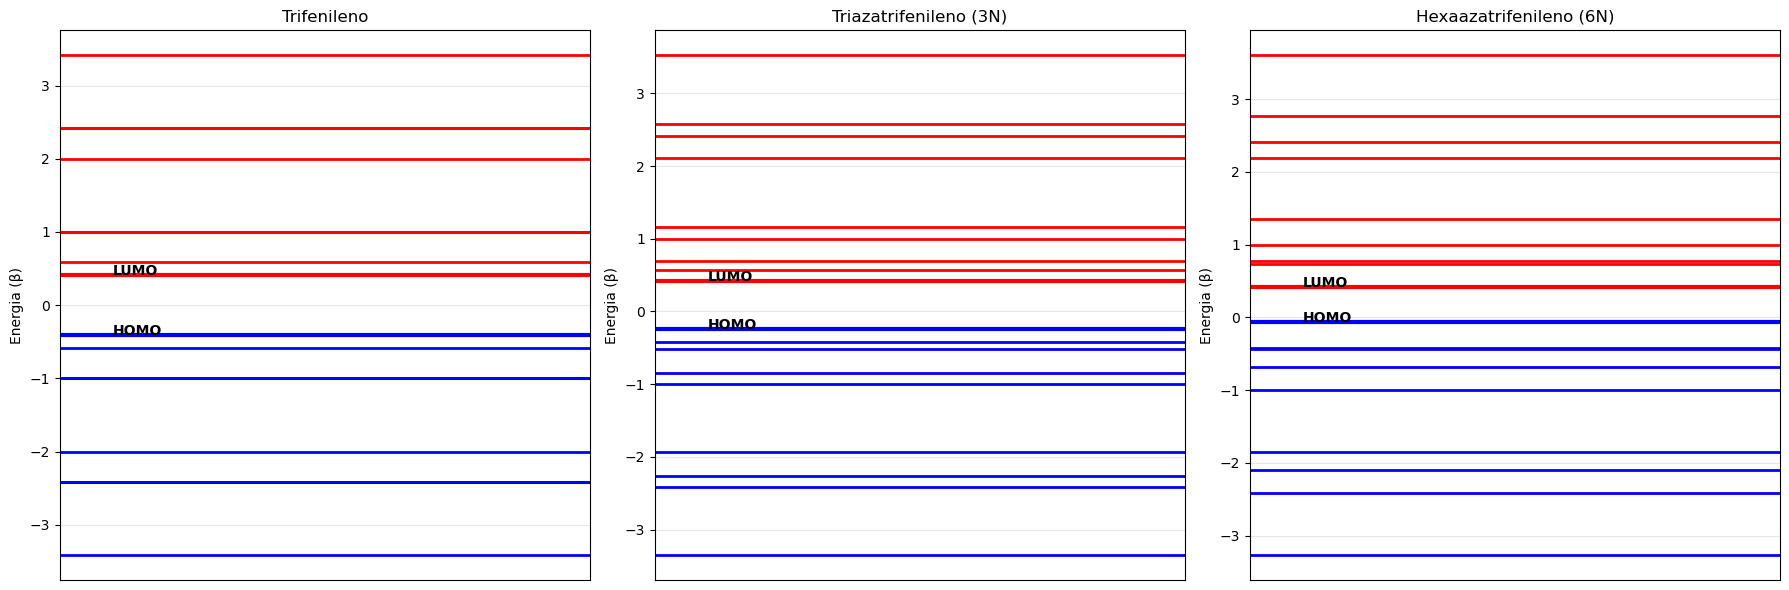

In [16]:
# Gráficos comparativos dos espectros de energia
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, (name, system) in enumerate(huckel_systems.items()):
    n_electrons = systems[name]['n_electrons']
    occupations = system.get_electron_configuration(n_electrons)
    homo_idx, lumo_idx, _, _ = system.get_homo_lumo(n_electrons)
    
    ax = axes[i]
    
    for j, energy in enumerate(system.eigenvalues):
        if occupations[j] == 2:
            color = 'blue'
        elif occupations[j] == 1:
            color = 'orange'
        else:
            color = 'red'
            
        linewidth = 3 if j in [homo_idx, lumo_idx] else 2
        ax.axhline(y=energy, color=color, linewidth=linewidth)
        
        if j == homo_idx:
            ax.text(0.1, energy, 'HOMO', fontweight='bold')
        elif j == lumo_idx:
            ax.text(0.1, energy, 'LUMO', fontweight='bold')
    
    ax.set_xlim(0, 1)
    ax.set_ylabel('Energia (β)')
    ax.set_title(name)
    ax.grid(True, alpha=0.3)
    ax.set_xticks([])

plt.tight_layout()
plt.savefig('trifenileno_espectros.png', dpi=300, bbox_inches='tight')
plt.show()

In [17]:
# Tabela de populações eletrônicas
pop_data = []
for name, data in results.items():
    atom_types = systems[name]['atom_types']
    for i, pop in enumerate(data['populations']):
        pop_data.append({
            'Sistema': name,
            'Átomo': i+1,
            'Tipo': atom_types[i],
            'População': pop
        })

df_populations = pd.DataFrame(pop_data)
print("Populações Eletrônicas por Átomo:")
print(df_populations.head(20))

# Salvar tabela
df_populations.to_csv('populacoes_eletronicas.csv', index=False)

Populações Eletrônicas por Átomo:
                   Sistema  Átomo Tipo  População
0              Trifenileno      1    C   1.000000
1              Trifenileno      2    C   1.000000
2              Trifenileno      3    C   1.000000
3              Trifenileno      4    C   1.000000
4              Trifenileno      5    C   1.000000
5              Trifenileno      6    C   1.000000
6              Trifenileno      7    C   1.000000
7              Trifenileno      8    C   1.000000
8              Trifenileno      9    C   1.000000
9              Trifenileno     10    C   1.000000
10             Trifenileno     11    C   1.000000
11             Trifenileno     12    C   1.000000
12             Trifenileno     13    C   1.000000
13             Trifenileno     14    C   1.000000
14             Trifenileno     15    C   1.000000
15             Trifenileno     16    C   1.000000
16             Trifenileno     17    C   1.000000
17             Trifenileno     18    C   1.000000
18  Triazatrifen

## Análises e Conclusões <a id="conclusoes"></a>

### Resumo dos Resultados

1. **Azepina**: Sistema de 7 membros com 1 nitrogênio
   - Número de elétrons π: 7
   - Caráter não-aromático devido à geometria não-planar
   - Gap HOMO-LUMO calculado

2. **Sistemas Trifenileno**:
   - Comparação entre 0N, 3N e 6N
   - Efeito da substituição por nitrogênio nos níveis de energia
   - Mudanças nas populações eletrônicas e ordens de ligação

In [19]:
# Análise final e verificações
print("VERIFICAÇÕES FINAIS:")
print("=" * 50)

# Verificação 1: Soma das populações eletrônicas
for name, data in results.items():
    total_electrons = sum(data['populations'])
    expected = systems[name]['n_electrons']
    print(f"{name}:")
    print(f"  Total de elétrons calculado: {total_electrons:.4f}")
    print(f"  Total esperado: {expected}")
    print(f"  Diferença: {abs(total_electrons - expected):.6f}")
    print()

# Verificação 2: Traço da matriz Hamiltoniana
for name, system in huckel_systems.items():
    trace_H = np.trace(system.hamiltonian)
    sum_eigenvalues = np.sum(system.eigenvalues)
    print(f"{name}:")
    print(f"  Tr(H): {trace_H:.6f}")
    print(f"  Σλᵢ: {sum_eigenvalues:.6f}")
    print(f"  Diferença: {abs(trace_H - sum_eigenvalues):.8f}")
    print()


VERIFICAÇÕES FINAIS:
Trifenileno:
  Total de elétrons calculado: 18.0000
  Total esperado: 18
  Diferença: 0.000000

Triazatrifenileno (3N):
  Total de elétrons calculado: 18.0000
  Total esperado: 18
  Diferença: 0.000000

Hexaazatrifenileno (6N):
  Total de elétrons calculado: 18.0000
  Total esperado: 18
  Diferença: 0.000000

Trifenileno:
  Tr(H): 0.000000
  Σλᵢ: 0.000000
  Diferença: 0.00000000

Triazatrifenileno (3N):
  Tr(H): 1.500000
  Σλᵢ: 1.500000
  Diferença: 0.00000000

Hexaazatrifenileno (6N):
  Tr(H): 3.000000
  Σλᵢ: 3.000000
  Diferença: 0.00000000

